In [76]:
# importing pandas
import pandas as pd

# loading dataset
data = pd.read_csv('data.csv')

# heading
data.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
1,623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0
2,4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1.0
3,6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1.0
4,6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1.0


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3074 entries, 0 to 3073
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3074 non-null   int64  
 1   Time        3074 non-null   float64
 2   V1          3074 non-null   float64
 3   V2          3074 non-null   float64
 4   V3          3074 non-null   float64
 5   V4          3074 non-null   float64
 6   V5          3074 non-null   float64
 7   V6          3074 non-null   float64
 8   V7          3074 non-null   float64
 9   V8          3074 non-null   float64
 10  V9          3074 non-null   float64
 11  V10         3074 non-null   float64
 12  V11         3073 non-null   float64
 13  V12         3073 non-null   float64
 14  V13         3073 non-null   float64
 15  V14         3073 non-null   float64
 16  V15         3073 non-null   float64
 17  V16         3073 non-null   float64
 18  V17         3073 non-null   float64
 19  V18         3073 non-null  

<AxesSubplot:xlabel='Class', ylabel='count'>

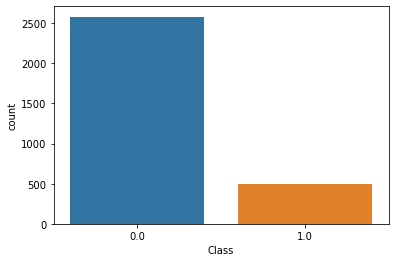

In [48]:
# importing the seaborn module
import seaborn as sns

# plotting the bar charts
sns.countplot(data = data, x = data['Class'])

In [49]:
# counting output classes
class_0, class_1 = data['Class'].value_counts()

# printing classes
print(class_0)
print(class_1)

2581
492


In [57]:
# two different datasets
Class_0 = data[data['Class'] == 0]

# second dataset
Class_1 = data[data['Class'] == 1]

# printing the shape of the classes
print('class 0:', Class_0.shape)
print('class 1:', Class_1.shape)

class 0: (2581, 32)
class 1: (492, 32)


In [41]:
# undersampling the majority class
class_0_under = Class_0.sample(class_1)

# concatinating the dataset
test_under = pd.concat([class_0_under, Class_1], axis=0)

# printing the shape of the classes
# two different datasets
Class_0 = test_under[test_under['Class'] == 0]

# second dataset
Class_1 = test_under[test_under['Class'] == 1]

# printing the shape of the classes
print('class 0:', Class_0.shape)
print('class 1:', Class_1.shape)

class 0: (492, 32)
class 1: (492, 32)


In [64]:
class_count_0, class_count_1 = data['Class'].value_counts()

# Separate class
class_0 = data[data['Class'] == 0]
class_1 = data[data['Class'] == 1]


class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_0], axis=0)


# two different datasets
Class_0 = test_over[test_over['Class'] == 0]

# second dataset
Class_1 = test_over[test_over['Class'] == 1]


# printing the shape of the classes
print('class 0:', Class_0.shape)
print('class 1:', Class_1.shape)

class 0: (2581, 32)
class 1: (2581, 32)


<AxesSubplot:xlabel='Class', ylabel='count'>

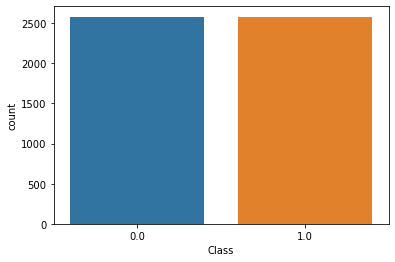

In [65]:
# plotting the bar charts
sns.countplot(data = test_over, x = test_over['Class'])

In [79]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler 
X, y = make_classification(n_classes=2, class_sep=2,
 weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Original dataset shape %s' % Counter(y))
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))


Original dataset shape Counter({1: 900, 0: 100})
Resampled dataset shape Counter({0: 100, 1: 100})


<BarContainer object of 2 artists>

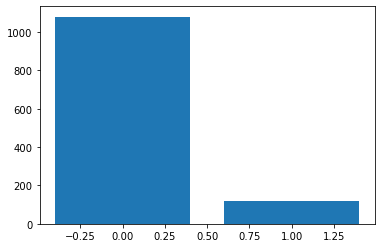

In [93]:
# inporting the modules
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# creaating a random classifition dataset
X, y = make_classification(n_classes=2, class_sep=2,
 weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
n_features=20, n_clusters_per_class=1, n_samples=1200, random_state=10)

# plotting bar charts
plt.bar([1,0],[np.count_nonzero(y == 0),np.count_nonzero(y == 1)])

In [95]:
# importing the random under sampler
from imblearn.under_sampling import RandomUnderSampler

# initializing the random sampler
rus = RandomUnderSampler(random_state=42, replacement=True)

# fitting x and y
x_rus, y_rus = rus.fit_resample(X, y)

# checking the orignal and resamples shaped
print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))


original dataset shape: Counter({1: 1080, 0: 120})
Resample dataset shape Counter({0: 120, 1: 120})


In [96]:
# importing the module
from imblearn.over_sampling import RandomOverSampler

# initializing the random sample
ros = RandomOverSampler(random_state=0)

# fitting the data
x_ros, y_ros = ros.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({1: 1080, 0: 120})
Resample dataset shape Counter({1: 1080, 0: 1080})


In [118]:
# importing the tomeklinks
from imblearn.under_sampling import TomekLinks

# initializing the model
tl = RandomOverSampler(sampling_strategy='minity')

# fit predictor and target variable
x_tl, y_tl = ros.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({1: 1080, 0: 120})
Resample dataset shape Counter({1: 1080, 0: 1080})


In [119]:
# import the smote library
from imblearn.over_sampling import SMOTE

# initializing the smote
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)


# printing
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))


Original dataset shape Counter({1: 1080, 0: 120})
Resample dataset shape Counter({1: 1080, 0: 1080})


In [121]:
# importing the module
from imblearn.under_sampling import NearMiss

# initializing nearmiss
nm = NearMiss()

# training the model
x_nm, y_nm = nm.fit_resample(X, y)

# handle imbalanced data in machine learning
print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_nm))

Original dataset shape: Counter({1: 1080, 0: 120})
Resample dataset shape: Counter({0: 120, 1: 120})
